**Import Libraries for data manipulation and numerical operations**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**Read the Datasets**

In [ ]:
# Read the csv data file
songs = pd.read_csv(r'C:\Users\mariajessa\OneDrive - Lambton College\2024W\Big Data Visualization\Project\fma-rock-vs-hiphop\fma-rock-vs-hiphop.csv')

# Read the JASON data file
metrics = pd.read_json(r'C:\Users\mariajessa\OneDrive - Lambton College\2024W\Big Data Visualization\Project\echonest-metrics\echonest-metrics.json')

**Explore the Datasets**

In [ ]:
# Display the first 5 rows of the metrics data
metrics.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


**Describe the dataset**

In [ ]:
# Display a summary of the metrics data

metrics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [ ]:
# Display the descriptive statistics of the track data regardless of the data type (categorical, datetime, and other types of columns)

metrics.describe(include='all')

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,13129.000000,1.312900e+04,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000
mean,34031.058268,5.246876e-01,0.487290,0.537516,0.640536,0.187804,0.099174,123.080061,0.439761
std,28950.422182,3.837186e-01,0.190148,0.278049,0.361430,0.158051,0.137381,35.015137,0.276028
min,2.000000,9.035000e-07,0.051307,0.000020,0.000000,0.025297,0.022324,12.753000,0.000010
25%,12986.000000,1.037726e-01,0.344759,0.321300,0.323466,0.101406,0.036932,95.967000,0.197321
50%,28097.000000,5.739848e-01,0.485635,0.549113,0.838134,0.119002,0.049019,120.057000,0.417743
75%,45021.000000,9.207270e-01,0.629094,0.776254,0.918244,0.211041,0.085452,145.318000,0.665575
max,124911.000000,9.957965e-01,0.968645,0.999964,0.998016,0.980330,0.966177,251.072000,0.999990


In [ ]:
# Display a summary of the songs data

songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

In [ ]:
# Display the descriptive statistics of the songs data regardless of the data type (categorical, datetime, and other types of columns)

songs.describe(include='all')

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
count,17734.000000,17734.000000,17734.000000,166,17734,1898,17734.000000,17734.000000,17734,17734,...,482,1.773400e+04,4089,17714,17734.000000,53,17734.000000,52,17734,17734
unique,NaN,NaN,NaN,55,14158,196,NaN,NaN,2,371,...,110,NaN,13,58,NaN,12,NaN,15,282,16460
top,NaN,NaN,NaN,Mors Ontologica,2009-04-30 15:22:50,2008-11-26 00:00:00,NaN,NaN,Rock,[21],...,"<p><a href=""http://www.myspace.com/theshambler...",NaN,en,Attribution-Noncommercial-No Derivative Works ...,NaN,Yshwa,NaN,Cherry Red Music (UK),[],Chicken and Cheese 2 (Foot Village cover)
freq,NaN,NaN,NaN,14,4,216,NaN,NaN,14182,2735,...,22,NaN,3897,3731,NaN,13,NaN,20,15579,46
mean,69394.145991,258971.413781,0.020695,NaN,NaN,NaN,220.942934,1.685237,NaN,NaN,...,NaN,1.678238e+03,NaN,NaN,1079.709541,NaN,6.184110,NaN,NaN,NaN
std,45784.589753,61535.621463,0.270070,NaN,NaN,NaN,177.906821,6.629402,NaN,NaN,...,NaN,9.394969e+03,NaN,NaN,4693.497635,NaN,7.075062,NaN,NaN,NaN
min,2.000000,-1.000000,0.000000,NaN,NaN,NaN,2.000000,0.000000,NaN,NaN,...,NaN,1.800000e+01,NaN,NaN,9.000000,NaN,0.000000,NaN,NaN,NaN
25%,29979.000000,220982.000000,0.000000,NaN,NaN,NaN,139.000000,0.000000,NaN,NaN,...,NaN,4.210000e+02,NaN,NaN,214.000000,NaN,2.000000,NaN,NaN,NaN
50%,64193.500000,256000.000000,0.000000,NaN,NaN,NaN,192.000000,1.000000,NaN,NaN,...,NaN,8.240000e+02,NaN,NaN,461.000000,NaN,5.000000,NaN,NaN,NaN
75%,109442.750000,320000.000000,0.000000,NaN,NaN,NaN,255.000000,2.000000,NaN,NaN,...,NaN,1.628000e+03,NaN,NaN,1018.000000,NaN,8.000000,NaN,NaN,NaN


**Data Cleaning**

In [ ]:
# Check for missing values in songs data

songs.isnull().sum()

track_id             0
bit_rate             0
comments             0
composer         17568
date_created         0
date_recorded    15836
duration             0
favorites            0
genre_top            0
genres               0
genres_all           0
information      17252
interest             0
language_code    13645
license             20
listens              0
lyricist         17681
number               0
publisher        17682
tags                 0
title                0
dtype: int64

In [ ]:
# Drop Columns with high number of missing values

columns_to_drop = ['composer', 'date_recorded', 'information', 'language_code', 'lyricist', 'publisher']
clean_track = songs.drop(columns=columns_to_drop)

In [ ]:
clean_track.head()

,track_id,bit_rate,comments,date_created,duration,favorites,genre_top,genres,genres_all,interest,license,listens,number,tags,title
0,135,256000,1,2008-11-26 01:43:26,837,0,Rock,"[45, 58]","[58, 12, 45]",2484,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,0,[],Father's Day
1,136,256000,1,2008-11-26 01:43:35,509,0,Rock,"[45, 58]","[58, 12, 45]",1948,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,0,[],Peel Back The Mountain Sky
2,151,192000,0,2008-11-26 01:44:55,192,0,Rock,[25],"[25, 12]",701,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,4,[],Untitled 04
3,152,192000,0,2008-11-26 01:44:58,193,0,Rock,[25],"[25, 12]",637,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,11,[],Untitled 11
4,153,256000,0,2008-11-26 01:45:00,405,5,Rock,[26],"[26, 12]",354,Attribution-NonCommercial-NoDerivatives (aka M...,424,2,[],Hundred-Year Flood


In [ ]:
clean_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   track_id      17734 non-null  int64 
 1   bit_rate      17734 non-null  int64 
 2   comments      17734 non-null  int64 
 3   date_created  17734 non-null  object
 4   duration      17734 non-null  int64 
 5   favorites     17734 non-null  int64 
 6   genre_top     17734 non-null  object
 7   genres        17734 non-null  object
 8   genres_all    17734 non-null  object
 9   interest      17734 non-null  int64 
 10  license       17714 non-null  object
 11  listens       17734 non-null  int64 
 12  number        17734 non-null  int64 
 13  tags          17734 non-null  object
 14  title         17734 non-null  object
dtypes: int64(8), object(7)
memory usage: 2.0+ MB


Merge the datasets

In [ ]:
# Merge the datasets as the datasets contain different sets of features that are relevant to predicting the genre.

echo_tracks = pd.merge(metrics, songs[["track_id", "genre_top"]], on="track_id")

In [ ]:
# Check the merged DataFrame

echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 375.3+ KB


In [ ]:
print(echo_tracks.head(5))

   track_id  acousticness  danceability    energy  instrumentalness  liveness  \
0         2      0.416675      0.675894  0.634476          0.010628  0.177647   
1         3      0.374408      0.528643  0.817461          0.001851  0.105880   
2         5      0.043567      0.745566  0.701470          0.000697  0.373143   
3       134      0.452217      0.513238  0.560410          0.019443  0.096567   
4       153      0.988306      0.255661  0.979774          0.973006  0.121342   

   speechiness    tempo   valence genre_top  
0     0.159310  165.922  0.576661   Hip-Hop  
1     0.461818  126.957  0.269240   Hip-Hop  
2     0.124595  100.260  0.621661   Hip-Hop  
3     0.525519  114.290  0.894072   Hip-Hop  
4     0.051740   90.241  0.034018      Rock  


In [ ]:
# Define the features and target variables
features = echo_tracks.drop(['genre_top', 'track_id'], axis=1)
target = echo_tracks['genre_top']

**Visualization Section**

C:\Users\mariajessa\AppData\Local\Temp\ipykernel_19968\1254215265.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='genre_top', data=echo_tracks, palette='coolwarm')


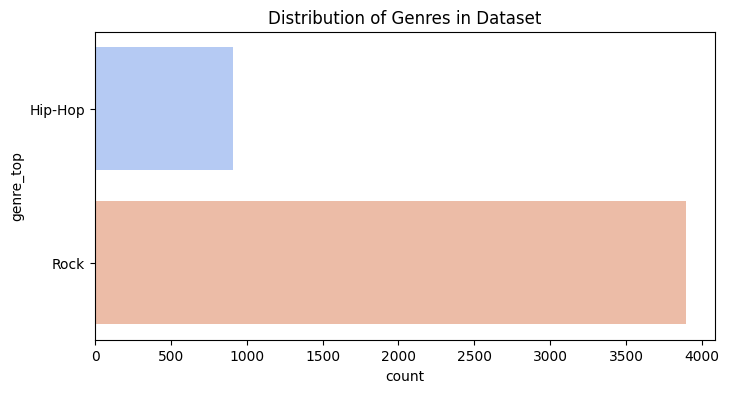

In [ ]:
# Visualization with Bar Chart - Genre Distribution

plt.figure(figsize=(8, 4))
sns.countplot(y='genre_top', data=echo_tracks, palette='coolwarm')
plt.title('Distribution of Genres in Dataset')
plt.show()

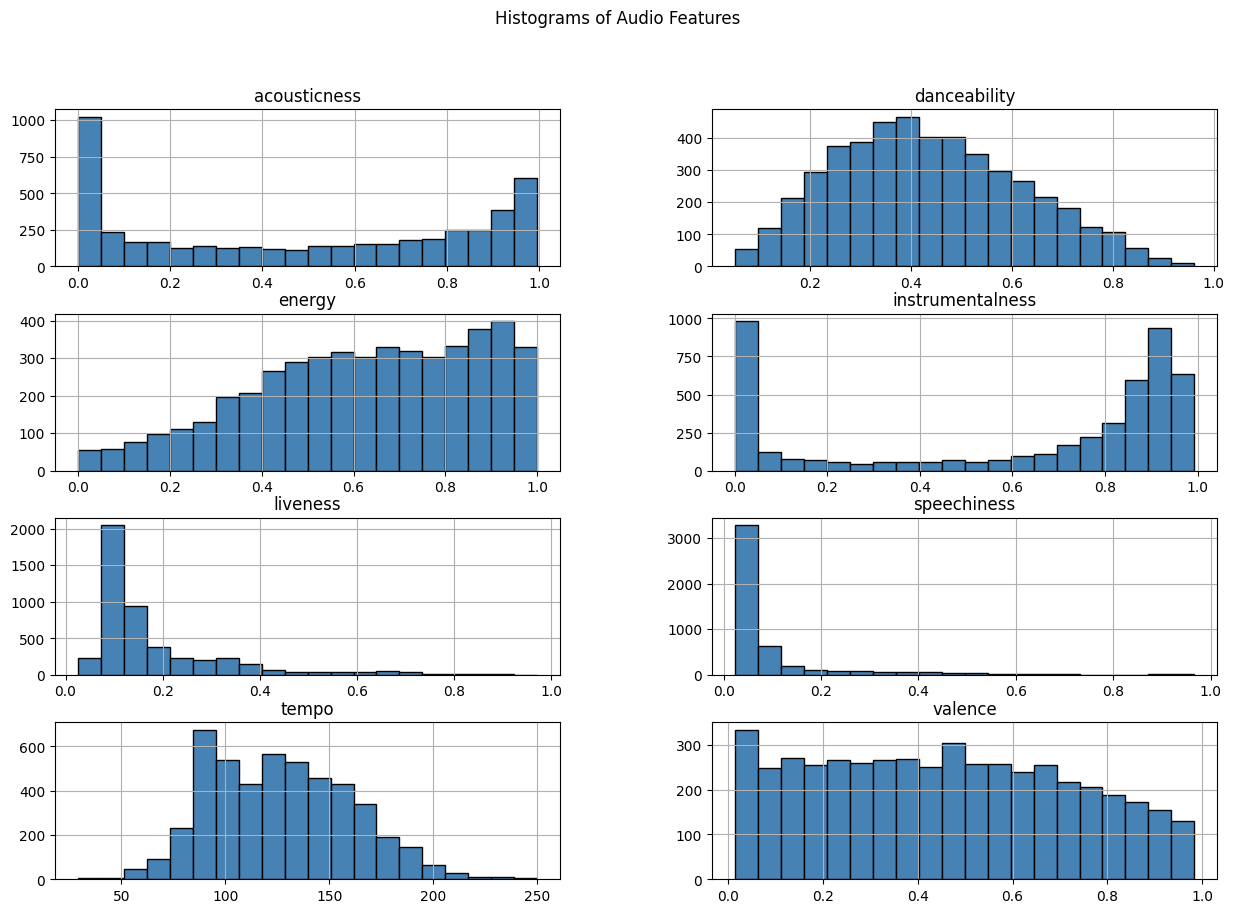

In [ ]:
# Visualization with Histograms, Scatterplots, and Boxplots

features_to_plot = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
echo_tracks[features_to_plot].hist(figsize=(15, 10), bins=20, layout=(4, 2), color='steelblue', edgecolor='black')
plt.suptitle('Histograms of Audio Features')
plt.show()

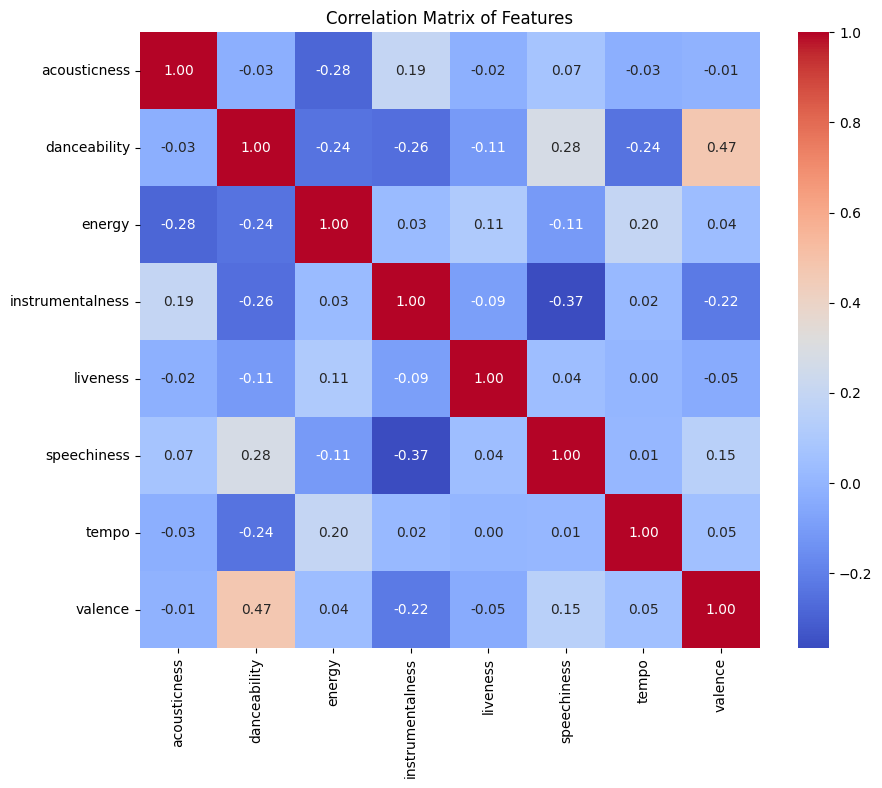

In [ ]:
# Create Heatmap of the Correlation Matrix

plt.figure(figsize=(10, 8))
corr = features.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

**Standard Scaling**

In [ ]:
# Standardize features

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# Perform PCA to get the variance ratios

pca = PCA(random_state=10).fit(scaled_features)
exp_variance = pca.explained_variance_ratio_
print("Explained variance ratio : \n{}".format(pca.explained_variance_ratio_))
print("\n")
print("Number of components = {}".format(pca.n_components_))

Explained variance ratio : 
[0.24297674 0.18044316 0.13650309 0.12994089 0.11056248 0.08302245
 0.06923783 0.04731336]


Number of components = 8


Text(0.5, 0, 'Principal Component #')

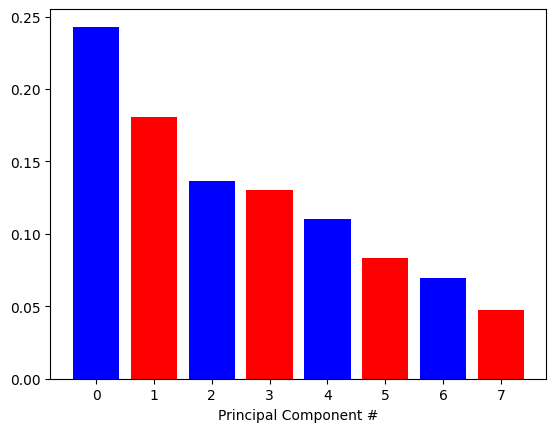

In [ ]:
# Plot the explained variance using a barplot

fig, ax = plt.subplots()
colors = ['blue', 'red']
ax.bar(range(len(exp_variance)), exp_variance, color=colors)
ax.set_xlabel('Principal Component #')

In [ ]:
# Calculate the cumulative explained variance

cum_exp_variance = np.cumsum(exp_variance)

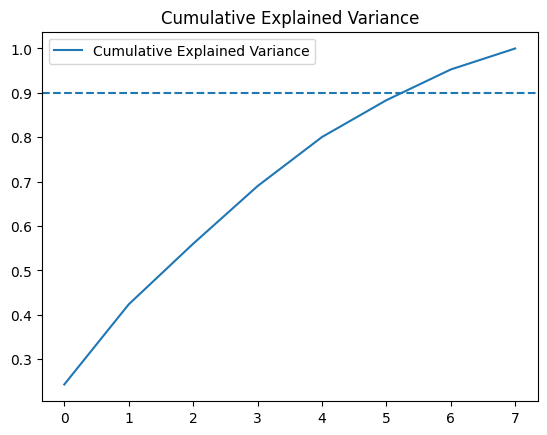

In [ ]:
# Plot the cumulative explained variance and draw a dashed line at 0.90.

fig, ax = plt.subplots()
ax.plot(range(len(exp_variance)), cum_exp_variance)
ax.axhline(y=0.9, linestyle='--')
ax.legend(['Cumulative Explained Variance'])
ax.set_title('Cumulative Explained Variance')
n_components = 6

In [ ]:
# Perform PCA with the chosen number of components and project data onto components

pca = PCA(n_components, random_state=10)
pca.fit(scaled_features)
pca_projection = pca.transform(scaled_features)

In [ ]:
# Split Data into Train and Test Sets
# Split the dataset into training and testing sets

train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=10)

**Model Implementation**

In [ ]:
# Model Training and Prediction

decision_tree = DecisionTreeClassifier(random_state=10)

In [ ]:
# Fit the model to the training data
decision_tree.fit(train_features, train_target)

DecisionTreeClassifier(random_state=10)

In [ ]:
# Predict using the trained model

tree_predictions = decision_tree.predict(test_features)

In [ ]:
# Predict and Evaluate Models

print("Decision Tree: \n", classification_report(test_target, tree_predictions))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.68      0.71      0.70       188
        Rock       0.93      0.92      0.92       773

    accuracy                           0.88       961
   macro avg       0.81      0.82      0.81       961
weighted avg       0.88      0.88      0.88       961

